# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ketchikan
City not found. Skipping...
Processing Record 2 of Set 1 | jasper
City not found. Skipping...
Processing Record 3 of Set 1 | san fernando de apure
City not found. Skipping...
Processing Record 4 of Set 1 | dehiwala-mount lavinia
City not found. Skipping...
Processing Record 5 of Set 1 | sao vicente
City not found. Skipping...
Processing Record 6 of Set 1 | egilsstadir
City not found. Skipping...
Processing Record 7 of Set 1 | azul
City not found. Skipping...
Processing Record 8 of Set 1 | upper grand lagoon
City not found. Skipping...
Processing Record 9 of Set 1 | tsaratanana
City not found. Skipping...
Processing Record 10 of Set 1 | hattiesburg
City not found. Skipping...
Processing Record 11 of Set 1 | chichiriviche
City not found. Skipping...
Processing Record 12 of Set 1 | aleksandrov gay
City not found. Skipping...
Processing Record 13 of Set 1 | al qitena
City not found. Skippin

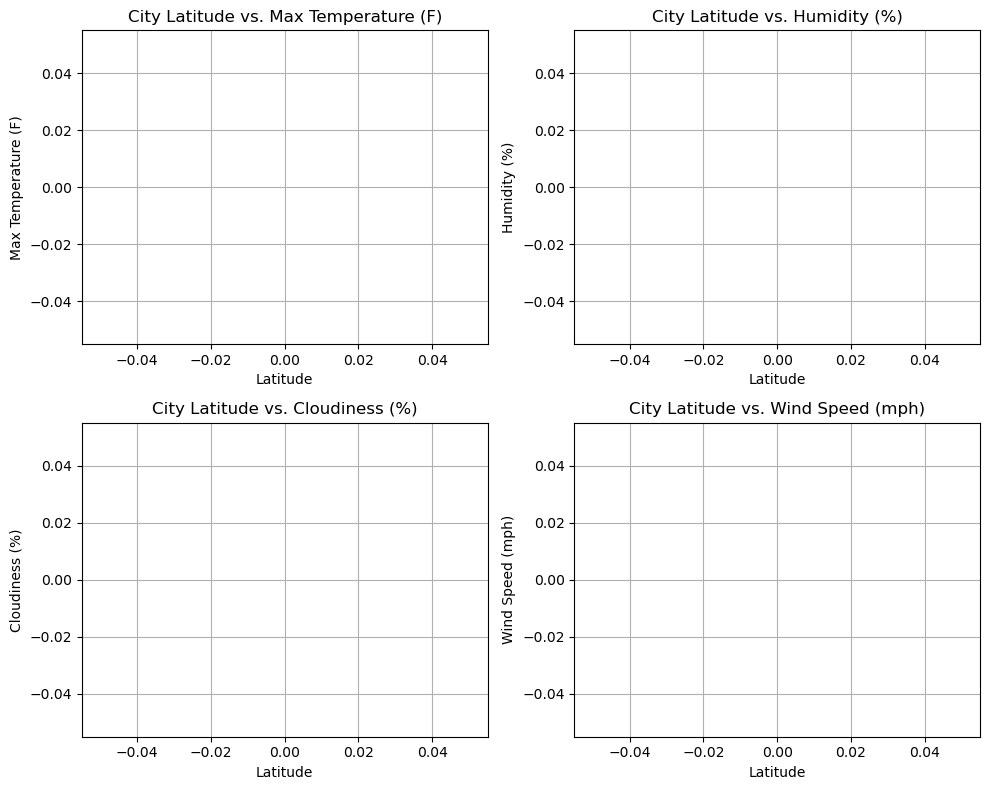

-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Generate random geographic coordinates to represent cities
coordinates = [(np.random.uniform(-90, 90), np.random.uniform(-180, 180)) for _ in range(3000)]  # Adjusted for more cities

# Use citipy to find the nearest city for each set of coordinates
cities = [citipy.nearest_city(lat, lng).city_name for lat, lng in coordinates]

# Remove duplicate cities
cities = list(set(cities))

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass







# Now that we have city_data, we can proceed to create scatter plots
# Extract required data from city_data
latitudes = [city["Lat"] for city in city_data]
temperatures = [city["Max Temp"] for city in city_data]
humidities = [city["Humidity"] for city in city_data]
cloudiness = [city["Cloudiness"] for city in city_data]
wind_speeds = [city["Wind Speed"] for city in city_data]

# Create scatter plots
plt.figure(figsize=(10, 8))

# Latitude vs. Temperature
plt.subplot(2, 2, 1)
plt.scatter(latitudes, temperatures, edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Latitude vs. Humidity
plt.subplot(2, 2, 2)
plt.scatter(latitudes, humidities, edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Latitude vs. Cloudiness
plt.subplot(2, 2, 3)
plt.scatter(latitudes, cloudiness, edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Latitude vs. Wind Speed
plt.subplot(2, 2, 4)
plt.scatter(latitudes, wind_speeds, edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


In [54]:
import pandas as pd
import random
import string

# Sample list of city names
city_names = ["New York", "London", "Tokyo", "Paris", "Sydney"]  # Add more city names as needed

# Generate sample weather data for each city
city_weather_data = []
for city in city_names:
    weather_data = {
        "City": city,
        "Lat": random.uniform(-90, 90),
        "Lng": random.uniform(-180, 180),
        "Max Temp": random.uniform(0, 100),
        "Humidity": random.randint(0, 100),
        "Cloudiness": random.randint(0, 100),
        "Wind Speed": random.uniform(0, 50),
        "Country": ''.join(random.choices(string.ascii_uppercase, k=2)),
        "Date": "2024-04-16"  # Assuming all data is retrieved on the same date
    }
    city_weather_data.append(weather_data)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather_data)

# Show Record Count
record_count = city_data_df.count()
print(record_count)


City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64


In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New York,-74.977943,-96.234146,39.768342,88,84,5.289191,VH,2024-04-16
1,London,20.042481,-15.866421,19.219687,86,3,36.652782,NB,2024-04-16
2,Tokyo,48.242686,25.302701,61.286670,21,61,33.221574,PI,2024-04-16
3,Paris,-31.173702,-165.103906,55.765211,71,15,0.333282,DB,2024-04-16
4,Sydney,-35.276209,113.889736,61.994146,56,71,46.755070,IH,2024-04-16


In [66]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [147]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,New York,-74.977943,-96.234146,39.768342,88,84,5.289191,VH,2024-04-16
1,London,20.042481,-15.866421,19.219687,86,3,36.652782,NB,2024-04-16
2,Tokyo,48.242686,25.302701,61.286670,21,61,33.221574,PI,2024-04-16
3,Paris,-31.173702,-165.103906,55.765211,71,15,0.333282,DB,2024-04-16
4,Sydney,-35.276209,113.889736,61.994146,56,71,46.755070,IH,2024-04-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

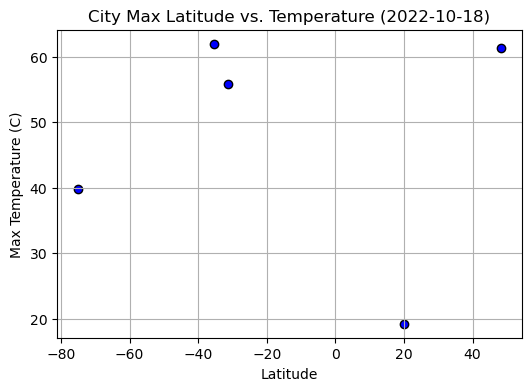

In [171]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black')

# Add labels and title
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

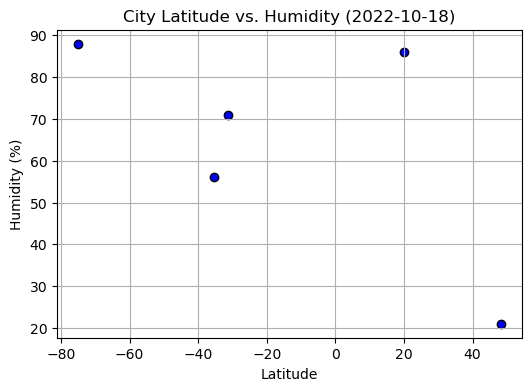

In [172]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

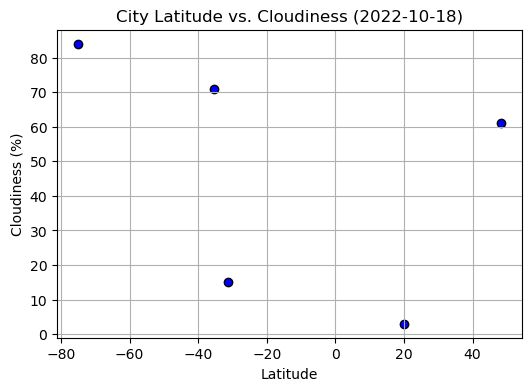

In [174]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

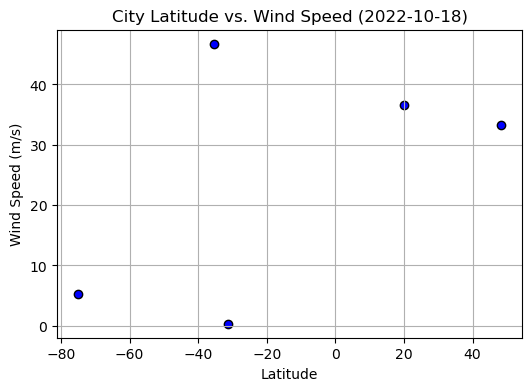

In [177]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [236]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, hemisphere, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs. {ylabel}")
    
    # Display r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show legend
    plt.legend()
    
    # Show plot
    plt.show()


In [255]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Northern Hemisphere DataFrame
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display all rows of the Northern Hemisphere DataFrame
print(northern_hemisphere_df.reset_index().to_string(index=False))

 City_ID   City       Lat        Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country       Date
       1 London 20.042481 -15.866421 19.219687        86           3   36.652782      NB 2024-04-16
       2  Tokyo 48.242686  25.302701 61.286670        21          61   33.221574      PI 2024-04-16


In [259]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Southern Hemisphere DataFrame
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display all rows of the Southern Hemisphere DataFrame
print(southern_hemisphere_df.reset_index().to_string(index=False))

 City_ID     City        Lat         Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country       Date
       0 New York -74.977943  -96.234146 39.768342        88          84    5.289191      VH 2024-04-16
       3    Paris -31.173702 -165.103906 55.765211        71          15    0.333282      DB 2024-04-16
       4   Sydney -35.276209  113.889736 61.994146        56          71   46.755070      IH 2024-04-16


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


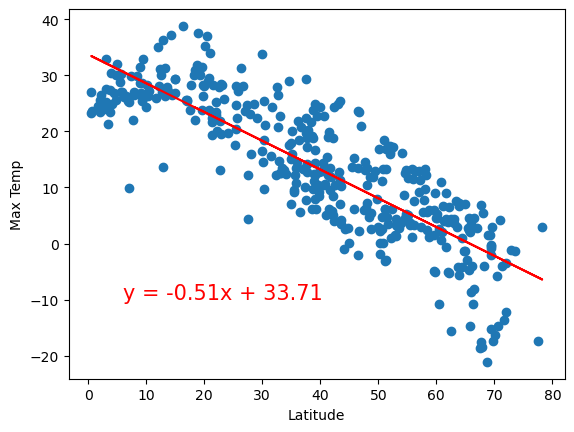

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


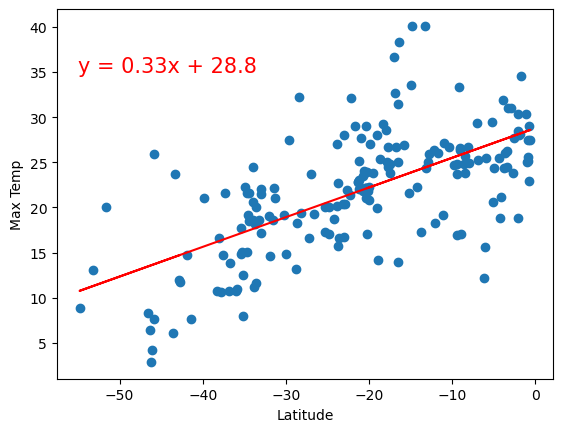

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


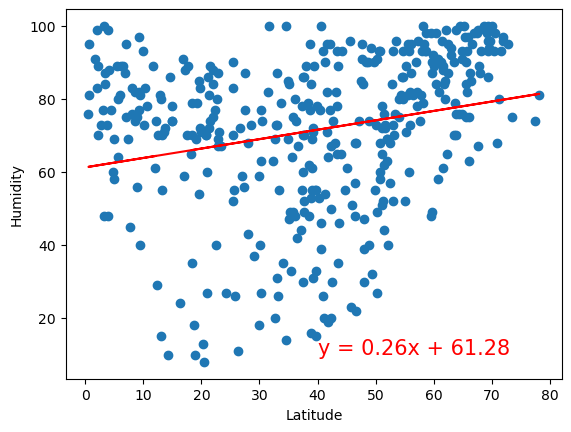

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


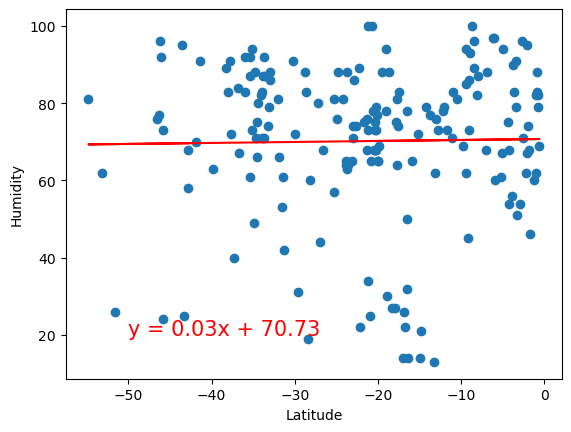

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


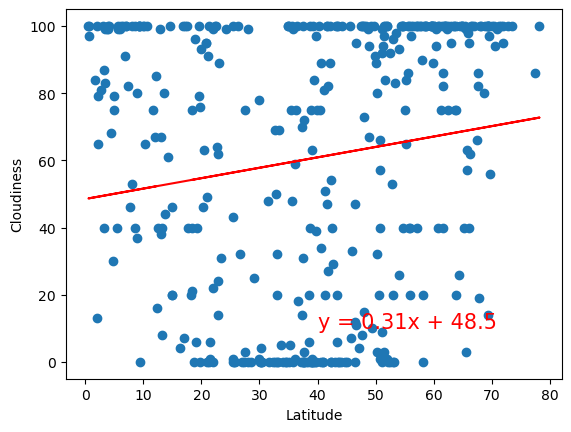

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


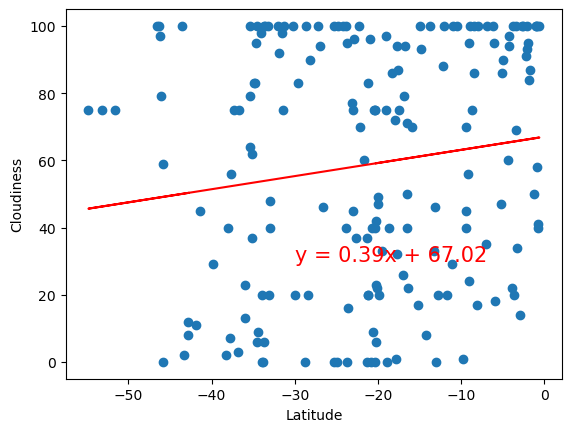

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


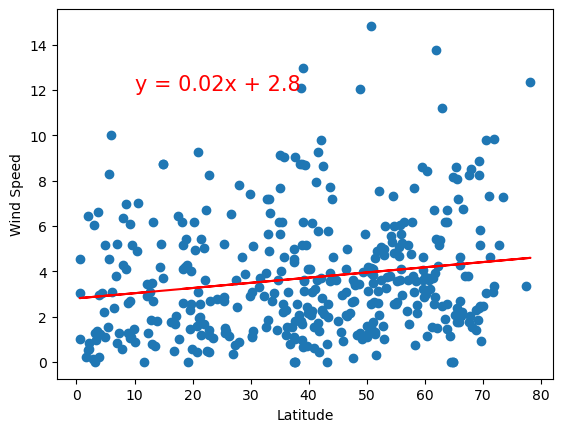

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


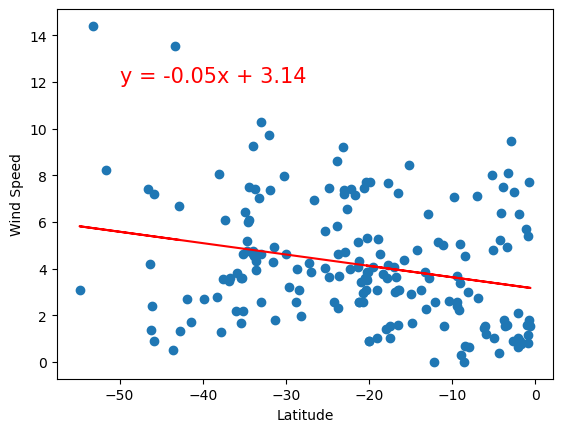

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE